## Installs and Imports

In [33]:
!pip install -Uqq fastbook wandb
import fastbook

In [34]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.callback.wandb import WandbCallback
from fastai.callback.tracker import SaveModelCallback

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from plotnine import *
import shutil
import wandb

## Dataset from Repository



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name="test"),
    get_y=parent_label,
    item_tfms=Resize(128, method=ResizeMethod.Squish), 
    batch_tfms=aug_transforms(size=128, flip_vert=True),
    )
dls = dblock.dataloaders("/content/drive/MyDrive/ET001/data", bs=128)

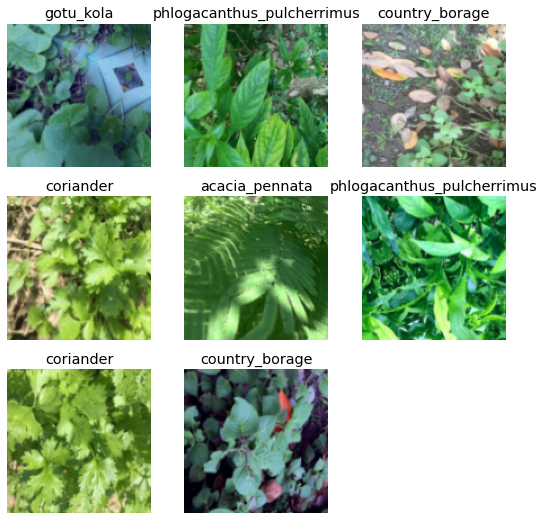

In [37]:
dls.train.show_batch(max_n=8, nrows=3)

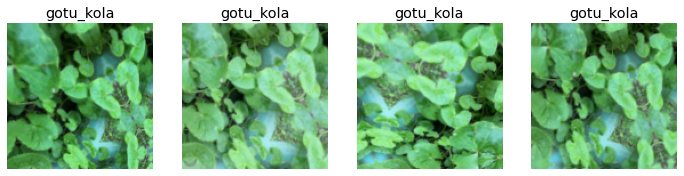

In [38]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Train Model

In [39]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy, 
                             Precision(average='micro'), 
                             Recall(average='micro'), 
                             F1Score(average='micro')
                             ]
                    ).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.


In [40]:
learn.fine_tune(epochs=10,
          base_lr=1e-3,
          freeze_epochs=1,
          lr_mult=100,
          pct_start=0.2,
          div=5.0)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.592759,0.527090,0.839205,0.839205,0.839205,0.839205,01:18


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.557761,0.416128,0.875568,0.875568,0.875568,0.875568,01:05
1,0.357323,0.349745,0.899432,0.899432,0.899432,0.899432,01:01
2,0.221844,0.264796,0.922159,0.922159,0.922159,0.922159,01:03
3,0.131946,0.279463,0.930114,0.930114,0.930114,0.930114,01:00
4,0.087356,0.280493,0.929545,0.929545,0.929545,0.929545,01:04
5,0.067697,0.234934,0.942045,0.942045,0.942045,0.942045,01:01
6,0.051739,0.235995,0.942614,0.942614,0.942614,0.942614,01:03
7,0.040191,0.215374,0.948864,0.948864,0.948864,0.948864,01:01
8,0.035245,0.205053,0.947159,0.947159,0.947159,0.947159,01:03
9,0.035520,0.213939,0.948295,0.948295,0.948295,0.948295,01:01


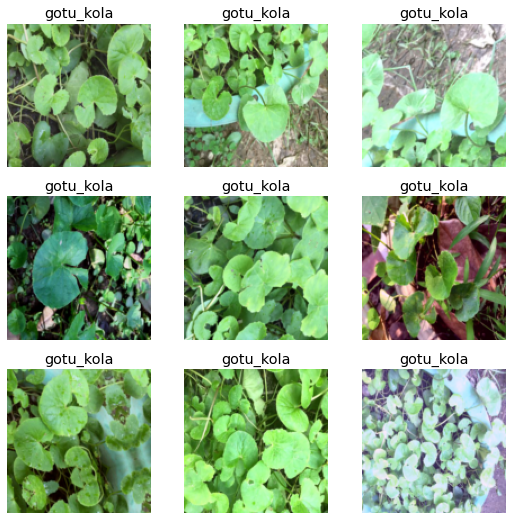

In [41]:
dls.valid.show_batch()

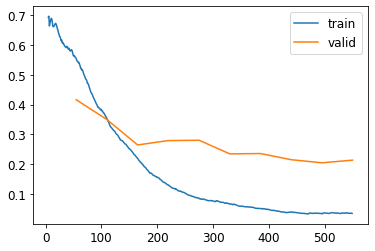

In [42]:
learn.recorder.plot_loss()

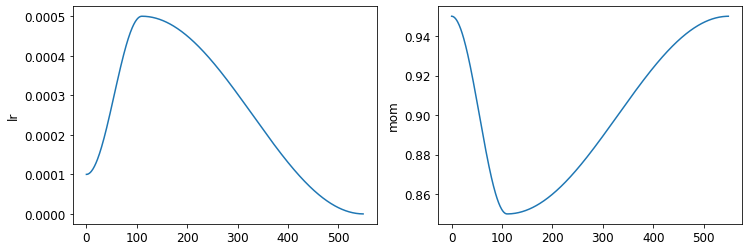

In [43]:
learn.recorder.plot_sched()

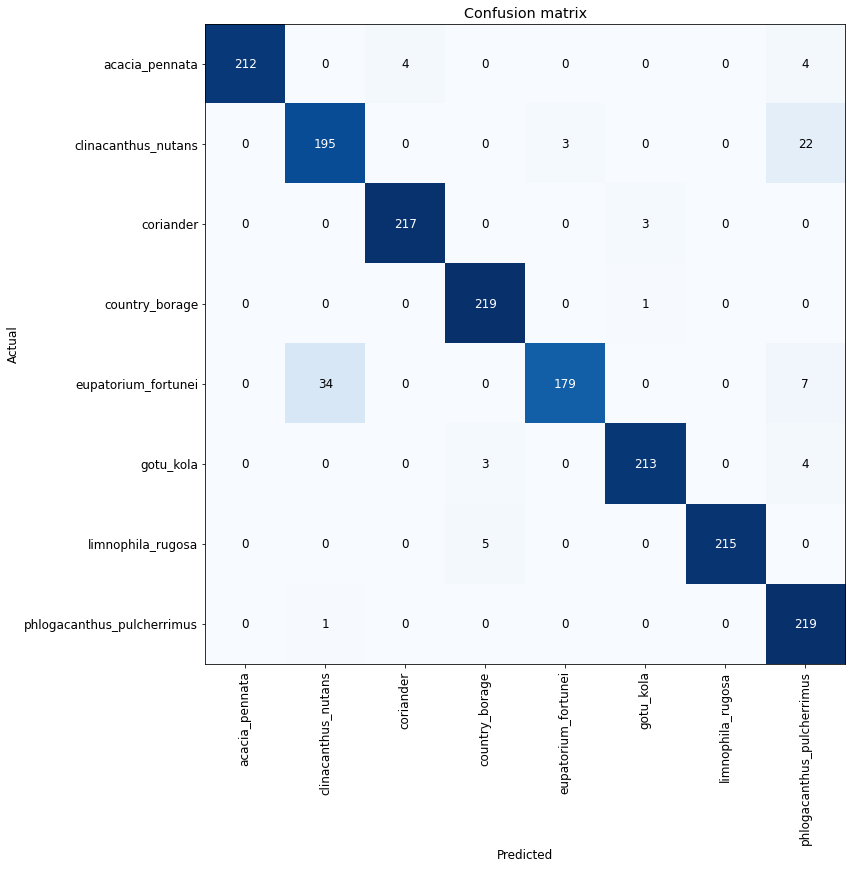

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

In [45]:
interp.print_classification_report()

                            precision    recall  f1-score   support

            acacia_pennata       1.00      0.96      0.98       220
       clinacanthus_nutans       0.85      0.89      0.87       220
                 coriander       0.98      0.99      0.98       220
            country_borage       0.96      1.00      0.98       220
       eupatorium_fortunei       0.98      0.81      0.89       220
                 gotu_kola       0.98      0.97      0.97       220
         limnophila_rugosa       1.00      0.98      0.99       220
phlogacanthus_pulcherrimus       0.86      1.00      0.92       220

                  accuracy                           0.95      1760
                 macro avg       0.95      0.95      0.95      1760
              weighted avg       0.95      0.95      0.95      1760



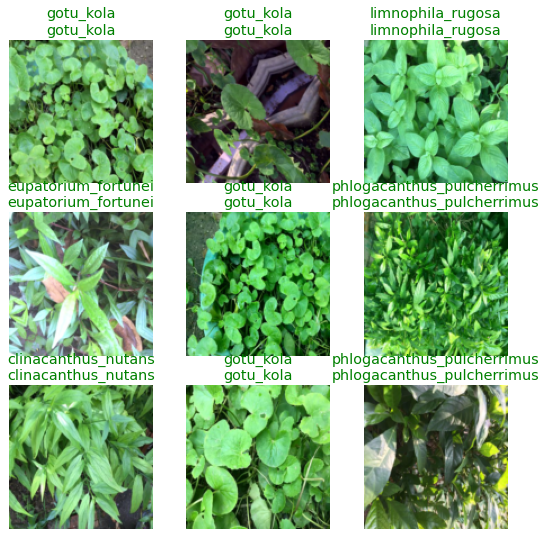

In [46]:
learn.show_results()